In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting.plot import MatplotlibBackend, Plot

plt.rcParams['figure.figsize'] = 10,10 # 更改圖片大小
x, y = symbols('x y')
rangex=(x,-12, 12)
rangey=(y,-12, 12)
# f:(x**2)+(y**2) = 10**2
f=Eq(x**2 + y**2,10**2)
p1=plot_implicit(f,rangex,rangey,show=False)
p1[0].line_color = 'green'

In [ ]:
# 讀取資料
from ast import literal_eval
inte_points=[[],[]] # Newton interpolation
points=[[],[]]
#real_points=[[],[]]
ps=[[],[]]

file=open('data.out', mode='r')
words=file.readline() # sample point:
for i in range(41):
    words=file.readline()
    str1=words.split(' ')
    points[0].append(literal_eval(str1[1]))
    points[1].append(literal_eval(str1[2]))
words=file.readline() # Newton interpolation:
for i in range(361):
    words=file.readline()
    str1=words.split(' ')
    inte_points[0].append(literal_eval(str1[1]))
    inte_points[1].append(literal_eval(str1[2]))

file.close()


# 繪圖:點
def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]

fig, axe = get_sympy_subplots(p1)
# add points and lines
axe.plot(inte_points[0],inte_points[1],color=(4/255, 131/255, 195/255),linewidth=1)
axe.plot(inte_points[0],inte_points[1],"o",color='blue',Markersize=2)
axe.plot(points[0],points[1],"o",color='red',Markersize=5)
axe.legend(["N = 40","","sample point","circle"])
plt.savefig('Newton_method_N=40.png')

<ipython-input-19-ce8fec2e1f33>:38: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axe.plot(inte_points[0],inte_points[1],"o",color='blue',Markersize=2)
<ipython-input-19-ce8fec2e1f33>:39: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axe.plot(points[0],points[1],"o",color='red',Markersize=5)


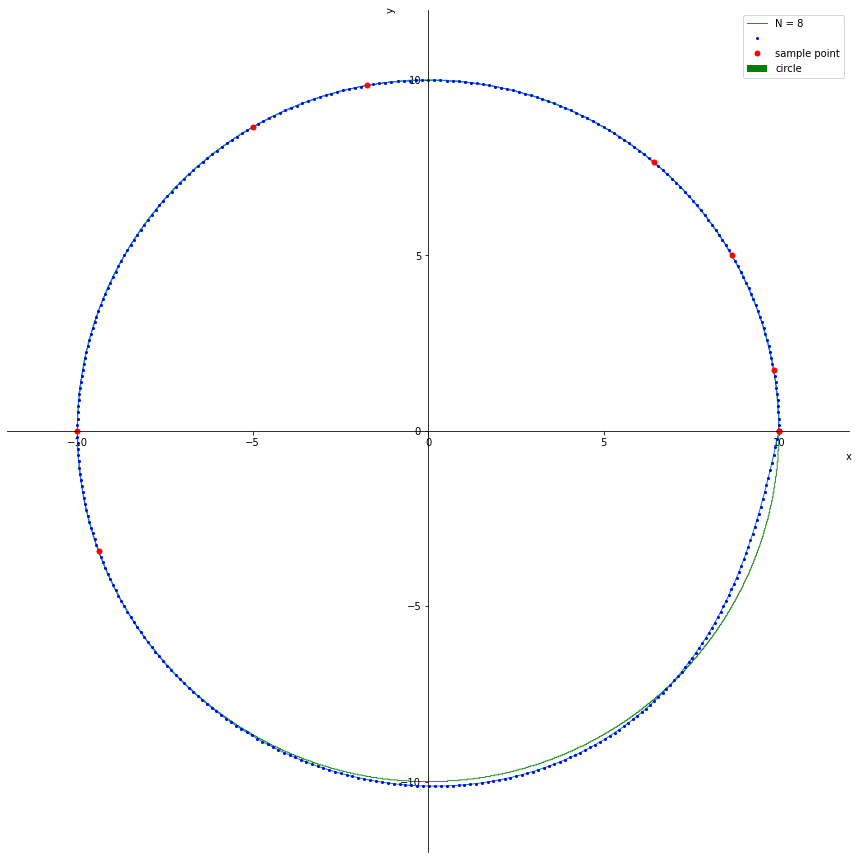

In [19]:
# 讀取資料(random取點)
from ast import literal_eval
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting.plot import MatplotlibBackend, Plot
inte_points=[[],[]] # Newton interpolation
points=[[],[]]
ps=[[],[]]

file=open('random4.out', mode='r')
words=file.readline() # sample point:
for i in range(9):
    words=file.readline()
    str1=words.split(' ')
    points[0].append(literal_eval(str1[1]))
    points[1].append(literal_eval(str1[2]))
words=file.readline() # Newton interpolation:
for i in range(361):
    words=file.readline()
    str1=words.split(' ')
    inte_points[0].append(literal_eval(str1[1]))
    inte_points[1].append(literal_eval(str1[2]))

file.close()


# 繪圖:點
def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]

fig, axe = get_sympy_subplots(p1)
# add points and lines
axe.plot(inte_points[0],inte_points[1],color=(4/255, 131/255, 195/255),linewidth=1)
axe.plot(inte_points[0],inte_points[1],"o",color='blue',Markersize=2)
axe.plot(points[0],points[1],"o",color='red',Markersize=5)
axe.legend(["N = 8","","sample point","circle"])
plt.savefig('Newton_method_random4.png')

In [ ]:
# prepare for gif
# 讀取資料

from ast import literal_eval
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting.plot import MatplotlibBackend, Plot

plt.rcParams['figure.figsize'] = 10,10 # 更改圖片大小
x, y = symbols('x y')
rangex=(x,-12, 12)
rangey=(y,-12, 12)
# f:(x**2)+(y**2) = 10**2
f=Eq(x**2 + y**2,10**2)
p1=plot_implicit(f,rangex,rangey,show=False)
p1[0].line_color = 'green'

inte_points=[[[],[]]] # Newton interpolation
inte=[[],[]]

file=open('data.out', mode='r')
for i in range(8,41,1):
    inte=[[],[]]
    words=file.readline() # N
    words=file.readline() # Newton interpolation:
    for i in range(361):
        words=file.readline()
        str1=words.split(' ')
        inte[0].append(literal_eval(str1[1]))
        inte[1].append(literal_eval(str1[2]))
    inte_points.append(inte)
file.close()

# 繪圖:點
def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]

#fig, axe = get_sympy_subplots(p1)
# add points and lines
for i in range(len(inte_points)):
    f=Eq(x**2 + y**2,10**2)
    p1=plot_implicit(f,rangex,rangey,show=False)
    p1[0].line_color = 'green'
    fig, axe = get_sympy_subplots(p1)
    c=(random.random(),random.random(),random.random())
    axe.plot(inte_points[i][0],inte_points[i][1],color=c,linewidth=1)
    axe.plot(inte_points[i][0],inte_points[i][1],"o",color=c,Markersize=2)
    axe.legend(["N = "+str(i+2),"","x^2+y^2=100"],loc="upper right")
    plt.savefig('images/'+str(i+2)+'.png')
    axe.clear()
#legend_str=[]
#for i in range(4,21,2):
#    legend_str.append(str(i))
#    legend_str.append('')
#axe.legend(legend_str)

In [9]:
# gif圖
import imageio
file_name=[]
for i in range(len(inte_points)):
    file_name.append('images/'+str(i+2)+'.png')
with imageio.get_writer('circles2.gif', mode='I') as writer:
    for filename in file_name:
        image = imageio.imread(filename)
        writer.append_data(image)

In [1]:
# piecewise
from ast import literal_eval
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting.plot import MatplotlibBackend, Plot

plt.rcParams['figure.figsize'] = 10,10 # 更改圖片大小
x, y = symbols('x y')
rangex=(x,-12, 12)
rangey=(y,-12, 12)
# f:(x**2)+(y**2) = 10**2
f=Eq(x**2 + y**2,10**2)
p1=plot_implicit(f,rangex,rangey,show=False)
p1[0].line_color = 'green'

In [5]:
# 取得各區域多項式
from ast import literal_eval
polyx=[[],[],[],[],[],[]]
polyy=[[],[],[],[],[],[]]
xs=[]
file=open('piecewise.out', mode='r')
for i in range(9):
    words=file.readline()
    str1=words.split(' ')
    xs.append(literal_eval(str1[0]))
for i in range(6):
    #words=file.readline() # i
    # x
    words=file.readline()
    str1=words.split(' ')
    for j in range(4):
        polyx[i].append(literal_eval(str1[j+1]))
    # y
    words=file.readline()
    str1=words.split(' ')
    for j in range(4):
        polyy[i].append(literal_eval(str1[j+1]))
file.close()

In [ ]:
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
from sympy import *
from sympy.plotting.plot import MatplotlibBackend, Plot
import numpy as np
import random
import matplotlib.pyplot as plt
def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]

plt.rcParams['figure.figsize'] = 10,10 # 更改圖片大小
x,y,theta=symbols('x y theta')
color=[]

x=((polyx[0][3]*(theta-xs[0])*(theta-xs[1])*(theta-xs[2])+polyx[0][2]*(theta-xs[0])*(theta-xs[1])+polyx[0][1]*(theta-xs[0])+polyx[0][0]))
y=((polyy[0][3]*(theta-xs[0])*(theta-xs[1])*(theta-xs[2])+polyy[0][2]*(theta-xs[0])*(theta-xs[1])+polyy[0][1]*(theta-xs[0])+polyy[0][0]))
c=(random.random(),random.random(),random.random())
p0=plot_parametric((x,y), (theta, 0.25*np.pi, 0.5*np.pi),show=False,line_color=c,xlim=(-12,12), ylim=(-12,12))
color.append(c)
#x=(10*cos(theta))
#y=(10*sin(theta))
#p=plot_parametric((x,y), (theta, 0, 2*np.pi),line_color='gray',show=False,xlim=(-12,12), ylim=(-12,12))
#p0.extend(p)
for i in range(1,6):
    x=((polyx[i][3]*(theta-xs[i])*(theta-xs[i+1])*(theta-xs[i+2])+polyx[i][2]*(theta-xs[i+0])*(theta-xs[i+1])+polyx[i][1]*(theta-xs[i+0])+polyx[i][0]))
    y=((polyy[i][3]*(theta-xs[i])*(theta-xs[i+1])*(theta-xs[i+2])+polyy[i][2]*(theta-xs[i+0])*(theta-xs[i+1])+polyy[i][1]*(theta-xs[i+0])+polyy[i][0]))
    c=(random.random(),random.random(),random.random())
    p=plot_parametric((x,y), (theta, 0.25*np.pi*(i+1), 0.25*np.pi*(i+2)),line_color=c,show=False,xlim=(-12,12), ylim=(-12,12))
    #p=plot_parametric((x,y), (theta, 0, 2*np.pi),line_color=c,show=False,xlim=(-12,12), ylim=(-12,12))
    color.append(c)
    p0.extend(p)

fig, axe = get_sympy_subplots(p0)
axe.text(6,9,'f0(θ)',fontsize=15,color=color[0])
axe.text(-6,9,'f1(θ)',fontsize=15,color=color[1])
axe.text(-11,4,'f2(θ)',fontsize=15,color=color[2])
axe.text(-11,-4,'f3(θ)',fontsize=15,color=color[3])
axe.text(-6,-9,'f4(θ)',fontsize=15,color=color[4])
axe.text(6,-9,'f5(θ)',fontsize=15,color=color[5])
plt.savefig('Piecewise_method_function3.png')

In [ ]:
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
from sympy import *
from sympy.plotting.plot import MatplotlibBackend, Plot
import numpy as np
import random
import matplotlib.pyplot as plt
def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]
def draw_region(i):

    plt.rcParams['figure.figsize'] = 10,10 # 更改圖片大小
    x,y,theta=symbols('x y theta')
    x=(10*cos(theta))
    y=(10*sin(theta))
    p0=plot_parametric((x,y), (theta, 0, 2*np.pi),line_color='gray',show=False,xlim=(-12,12), ylim=(-12,12))
    
    x=((polyx[i][3]*(theta-xs[i])*(theta-xs[i+1])*(theta-xs[i+2])+polyx[i][2]*(theta-xs[i+0])*(theta-xs[i+1])+polyx[i][1]*(theta-xs[i+0])+polyx[i][0]))
    y=((polyy[i][3]*(theta-xs[i])*(theta-xs[i+1])*(theta-xs[i+2])+polyy[i][2]*(theta-xs[i+0])*(theta-xs[i+1])+polyy[i][1]*(theta-xs[i+0])+polyy[i][0]))
    c=(random.random(),random.random(),random.random())
    p=plot_parametric((x,y), (theta, -2*np.pi, 2*np.pi),line_color='blue',show=False,xlim=(-12,12), ylim=(-12,12))
    p1=plot_parametric((x,y), (theta, 0.25*np.pi*(i+1), 0.25*np.pi*(i+2)),line_color='red',show=False,xlim=(-12,12), ylim=(-12,12))
    p0.extend(p)
    p0.extend(p1)
    fig, axe = get_sympy_subplots(p0)
    plt.savefig('Piecewise_method_function_region'+str(i)+'.png')
for i in range(6):
    draw_region(i)

In [ ]:
file=open('piecewise_p.out', mode='r')
ps=[[],[]]
points=[[],[]]
words=file.readline()
for i in range(9):
    words=file.readline()
    str1=words.split(' ')
    points[0].append(literal_eval(str1[1]))
    points[1].append(literal_eval(str1[2]))
words=file.readline()
words=file.readlines()
for word in words:
    str1=word.split(' ')
    ps[0].append(literal_eval(str1[0]))
    ps[1].append(literal_eval(str1[1]))
file.close()
def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]

fig, axe = get_sympy_subplots(p1)
for i in range(len(points[0])):
    if i==8: axe.text(points[0][i]+0.1,points[1][i]-0.8,'p'+str(i),fontsize=15,color='red')
    else:
        axe.text(points[0][i]+0.1,points[1][i]+0.1,'p'+str(i),fontsize=15,color='red')
axe.plot(ps[0],ps[1],"o",Markersize=2,color='blue')
axe.plot(points[0],points[1],"o",Markersize=5,color='red')
axe.legend(["N = 8","","sample point","circle"])
plt.savefig('Piecewise_method_N=8.png')

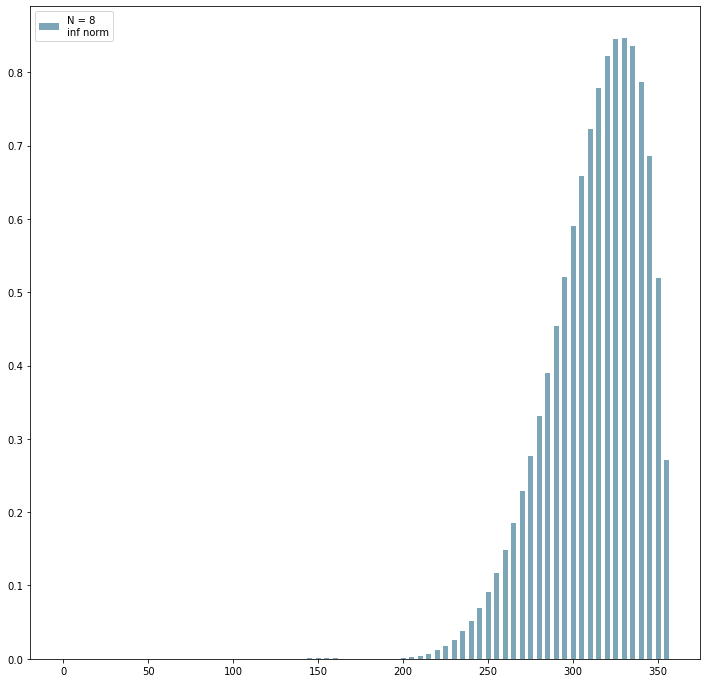

In [22]:
# 繪製norm bar
import matplotlib.pyplot as plt
from ast import literal_eval
def draw_norm_bar(file_name,labels,image_name):
    file=open(file_name, mode='r')
    data=[]
    x=[]
    words=file.readlines()
    cnt=0
    for word in words:
        str1=word.split(' ')
        x.append(cnt*5)
        cnt+=1
        data.append(literal_eval(str1[4]))
    file.close()

    plt.rcParams['figure.figsize'] = 12,12 # 更改圖片大小
    plt.bar(x, data,color='#7CA5B8',label=labels,width=3.0)
    plt.legend(loc="upper left")
    plt.savefig(image_name)
    plt.show()

draw_norm_bar('random4_inf_norm.out',"N = 8\ninf norm","random4_inf_norm.jpg")

In [ ]:
draw_norm_bar('Newton_N=4_2norm.out',"N = 4\n2 norm",'Newton_N=4_2norm.jpg')
draw_norm_bar('Newton_N=4_inf_norm.out',"N = 4\ninf norm",'Newton_N=4_inf_norm.jpg')
draw_norm_bar('Newton_N=8_2norm.out',"N = 8\n2 norm",'Newton_N=8_2norm.jpg')
draw_norm_bar('Newton_N=8_inf_norm.out',"N = 8\ninf norm",'Newton_N=8_inf_norm.jpg')
draw_norm_bar('Newton_N=16_2norm.out',"N = 16\n2 norm",'Newton_N=16_2norm.jpg')
draw_norm_bar('Newton_N=16_inf_norm.out',"N = 16\ninf norm",'Newton_N=16_inf_norm.jpg')
draw_norm_bar('Newton_N=24_2norm.out',"N = 24\n2 norm",'Newton_N=24_2norm.jpg')
draw_norm_bar('Newton_N=24_inf_norm.out',"N = 24\ninf norm",'Newton_N=24_inf_norm.jpg')
draw_norm_bar('Newton_N=40_2norm.out',"N = 40\n2 norm",'Newton_N=40_2norm.jpg')
draw_norm_bar('Newton_N=40_inf_norm.out',"N = 40\ninf norm",'Newton_N=40_inf_norm.jpg')
draw_norm_bar('piecewise_N=8_2norm.out',"N = 8\n2 norm",'piecewise_N=8_2norm.jpg')
draw_norm_bar('piecewise_N=8_inf_norm.out',"N = 8\ninf norm",'piecewise_N=8_inf_norm.jpg')
draw_norm_bar('random_inf_norm.out',"N = 5\ninf norm","random_inf_norm.jpg")